In [1]:
##### librosa is a python package for music and audio analysis. 
##### It provides the building blocks necessary to create music information retrieval systems.

import librosa

##### NumPy stands for Numerical Python.
##### NumPy is a Python library used for working with arrays.
##### It also has functions for working in domain of linear algebra, fourier transform, and matrices.
##### At the core of the NumPy package, is the ndarray object. 
##### This encapsulates n-dimensional arrays of homogeneous data types, with many operations being performed in compiled code for performance.

import numpy as np


##### Pandas is a Python library for data analysis.
##### Pandas is built on top of two core Python libraries—matplotlib for data visualization and NumPy for mathematical operations. 
##### Pandas acts as a wrapper over these libraries, allowing you to access many of matplotlib's and NumPy's methods with less code.

import pandas as pd

##### Pyplot is a collection of functions in the popular visualization package Matplotlib. 
##### Its functions manipulate elements of a figure, such as creating a figure, creating a plotting area, plotting lines, adding plot labels, etc.

import matplotlib.pyplot as plt


##### For data visualizations
import librosa.display


##### Keras is a high-level neural networks library that is running on the top of TensorFlow
##### It is user friendly, Modular and Composable , Easy to extend , Easy to use.
import keras

##### date and time are not a data type of their own, but a module named datetime can be imported to work with the date as well as time. 
##### Python Datetime module comes built into Python, so there is no need to install it externally.
##### Python Datetime module supplies classes to work with date and time. 
##### These classes provide a number of functions to deal with dates, times and time intervals

import datetime

##### Seaborn is an amazing visualization library for statistical graphics plotting in Python. 
##### It provides beautiful default styles and color palettes to make statistical plots more attractive. 
##### It is built on the top of matplotlib library and also closely integrated to the data structures from pandas.

import seaborn as sns

##### Label Encoding in Python can be achieved using Sklearn Library. 
##### Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. 
##### LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels.

from sklearn.preprocessing import LabelEncoder 


##### train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. 
##### With this function, you don't need to divide the dataset manually.

from sklearn.model_selection import train_test_split

##### A confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier. 
##### It can be used to evaluate the performance of a classification model through the calculation of performance metrics like accuracy, precision, recall, and F1-score.

from sklearn.metrics import confusion_matrix

##### A Classification report is used to measure the quality of predictions from a classification algorithm.
from sklearn.metrics import classification_report

##### Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.
from sklearn.decomposition import PCA

##### Data Preprocessing is a technique that is used to convert the raw data into a clean data set.
from sklearn import preprocessing


In [2]:
##### The following parameters are defined for the graphs and plots.

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10
                                 ) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)
#Hosted on Jovian



In [3]:
##### is used to run new applications or programs through Python code by creating new processes. 
##### It also helps to obtain the input/output/error pipes as well as the exit codes of various commands.

from subprocess import call

##### The Python subprocess call() function returns the executed code of the program. 
##### If there is no program output, the function will return the code that it executed successfully. 
##### It may also raise a CalledProcessError exception

r=call('ffmpeg -i "trim.mp3" -acodec pcm_u8 -ar 22050 "trim.wav"',shell=True)

In [4]:
##### Here we are assigned two variables "y" and "sr" and loading the "trim.wav" audio file.

y, sr = librosa.load("trim.wav")

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

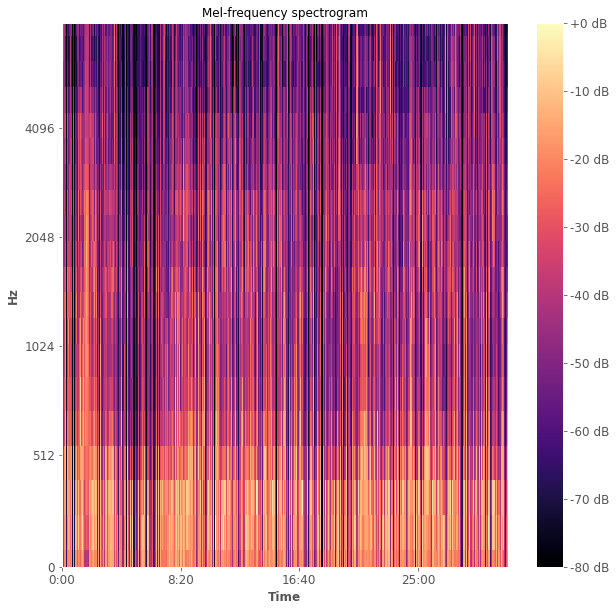

In [5]:
#y,sr = librosa.load('trim.mp3')

##### Compute the duration (in seconds) of an audio time series, feature matrix, filename.
dur_time = librosa.get_duration(y,sr=sr)


##### The Python round() method rounds a number to a specific decimal place. 
##### This method returns a floating-point number rounded to your specifications. 
##### By default, the round() method rounds a number to zero decimal places.
##### We are using here reound() for making the figure with zero decimal places

time_sec = round(dur_time)

##### MEL spectogram is a frequency representation of the audio signal that is transformed in order to get closer to our perception of the sound.

##### If a time-series input y, sr is provided, then its magnitude spectrogram S is first computed, and then mapped onto the mel scale by mel_f.dot(S**power).

##### By default, power=2 operates on a power spectrum.

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=20, fmax=8000)

fig, ax = plt.subplots()

##### Convert a power spectrogram (amplitude squared) to decibel (dB) units

##### This computes the scaling 10 * log10(S / ref) in a numerically stable way.
S_dB = librosa.power_to_db(S, ref=np.max)

##### All of librosa’s plotting functions rely on matplotlib.
##### we are using librosa.display.specshow() for Display a spectrogram/chromagram.
img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr,fmax=8000, ax=ax)

##### The colorbar() method of figure module of matplotlib library is used to add a colorbar to a plot.
fig.colorbar(img, ax=ax, format='%+2.0f dB')

##### Here we are giving the title to the graph using set()
ax.set(title='Mel-frequency spectrogram')

#plt.xlim(60,120)

In [6]:
##### So we basically have a 20 frequencies representation of the signal. The sample rate is 22010 Hz, thus the time vector can be extracted using this code:

In [7]:
start = 0 
end = time_sec 
time_series_sec = np.linspace(start,end,len(S_dB[0]))

In [8]:
##### As we have the time in fraction of seconds, we convert the ending minute in seconds.

In [9]:
##### Here we are loading the another dataset and assinging it into variable name "data"

data = pd.read_csv('us_election_2020_1st_presidential_debate.csv')

In [10]:
##### Here we are creating the function with the name "convert_to_sec"

def convert_to_sec(time_string):
  ##### here we are converting the time_string into list by using split() and saving it into variable time_s_list.
    time_s_list = time_string.split(':')
    if len(time_s_list)>2:
        date_time = datetime.datetime.strptime(time_string, "%H:%M:%S")
        a_timedelta = date_time - datetime.datetime(1900, 1, 1)
        seconds = a_timedelta.total_seconds()
    else:
        date_time = datetime.datetime.strptime(time_string, "%M:%S")
        a_timedelta = date_time - datetime.datetime(1900, 1, 1)
        seconds = a_timedelta.total_seconds()
    return seconds

In [11]:
##### Pandas tolist() is used to convert a series to list. 
##### Initially the series is of type pandas.core.series.Series and applying tolist() method, it is converted to list data type.

##### tolist :- Converted series into List
##### Here we are converting data[minute] series into List

minute_list = data.minute.tolist()

print(minute_list)

['01:20', '02:10', '02:49', '02:51', '02:51', '03:11', '04:01', '04:53', '05:22', '05:29', '05:34', '05:36', '06:12', '07:08', '07:34', '08:01', '08:02', '08:24', '08:25', '08:29', '08:31', '08:32', '08:33', '08:58', '09:00', '09:02', '09:05', '09:08', '09:09', '09:11', '09:12', '09:39', '09:47', '09:48', '09:58', '10:00', '10:04', '10:04', '10:05', '10:06', '10:11', '10:25', '10:31', '10:32', '10:33', '10:34', '10:35', '10:36', '10:40', '10:51', '10:51', '11:05', '11:05', '11:07', '11:08', '11:11', '11:11', '11:25', '11:26', '11:28', '11:31', '11:32', '11:35', '11:36', '11:38', '11:38', '11:44', '11:44', '11:46', '11:52', '11:53', '12:16', '12:40', '12:40', '12:41', '12:42', '13:03', '13:04', '13:06', '13:17', '13:17', '13:23', '13:25', '13:26', '13:29', '13:32', '13:57', '14:04', '14:05', '14:06', '14:10', '14:10', '14:12', '14:12', '14:14', '14:17', '14:18', '14:21', '14:23', '14:23', '14:25', '14:25', '14:34', '14:41', '14:43', '14:44', '14:46', '14:47', '14:51', '14:55', '14:57', 

In [12]:
###### Here we are creating empty list and assigned it to the variable SEC_LIST

SEC_LIST = []
for t in minute_list:
    try:
        SEC_LIST.append(convert_to_sec(t))  ##### Here we are appending the above created minute_list to the empty list SEC_LIST.
    except:
        SEC_LIST.append(0)
for k in range(2):
    for i in range(len(SEC_LIST)-1):
        if SEC_LIST[i]==SEC_LIST[i+1]:
            SEC_LIST[i+1]=SEC_LIST[i]+1
turn_index = SEC_LIST.index(0)
to_add = SEC_LIST[turn_index-1]
for j in range(turn_index,len(SEC_LIST)):
    SEC_LIST[j]=SEC_LIST[j]+to_add
data['Seconds']=SEC_LIST

##### Here we are creating and addimg the new variable "Seconds" with the the values of variable"SEC_LIST".

In [13]:
data.head()

,speaker,minute,text,Seconds
0,Chris Wallace,01:20,Good evening from the Health Education Campus ...,80.0
1,Chris Wallace,02:10,This debate is being conducted under health an...,130.0
2,Vice President Joe Biden,02:49,"How you doing, man?",169.0
3,President Donald J. Trump,02:51,How are you doing?,171.0
4,Vice President Joe Biden,02:51,I’m well.,172.0


In [14]:
##### Here we are extracting the data of database name "data" from the coloumn Seconds with the maximum duration of seconds.
##### Storing it into new variable new_data.

new_data = data[data.Seconds<=time_series_sec.max()]

##### Here we are creating new coloumn with name speaker.
new_data.speaker = new_data.speaker.replace({'Chris Wallace:':'Chris Wallace'})

C:\Users\smrut\anaconda\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
##### Here we are calculating the max seconds from the the Seconds coloumn and storing it into new variable max_sec.

max_sec = new_data.Seconds.max()

In [16]:
##### Here we are dropping the duplicates from the new_data considering coloumn "speaker"
##### subset: Subset takes a column or list of column label. 
##### It’s default value is none. After passing columns, it will consider them only for duplicates. 

new_data.drop_duplicates(subset='speaker')

,speaker,minute,text,Seconds
0,Chris Wallace,01:20,Good evening from the Health Education Campus ...,80.0
2,Vice President Joe Biden,02:49,"How you doing, man?",169.0
3,President Donald J. Trump,02:51,How are you doing?,171.0


C:\Users\smrut\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


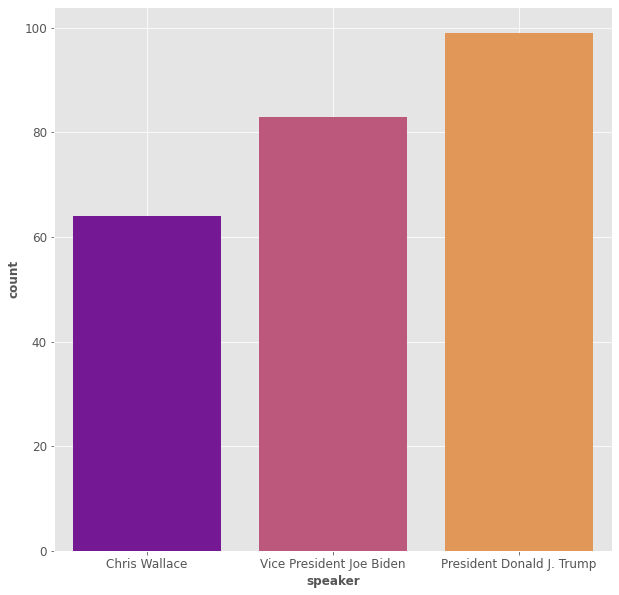

In [17]:
##### Here we are creating the counterplot for the coloumn speaker.

sns.countplot(new_data.speaker,palette='plasma')

plt.grid(True)



In [18]:
##### It is now comfortable to convert the audio data into a pandas dataframe

In [19]:
#audio data int pandas

In [20]:
audio_data = pd.DataFrame(S_dB)

In [21]:
audio_data = audio_data.T

In [22]:
audio_data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
80896,-36.636490,-38.123768,-36.455605,-39.904030,-40.652206,-40.662361,-43.983158,-43.520752,-43.873215,-46.174065,-49.608421,-49.467701,-41.303589,-41.252930,-30.108000,-30.056393,-36.182400,-36.379585,-35.802147,-33.990311
80897,-24.208208,-22.765339,-18.691828,-21.861235,-34.091187,-36.617973,-38.753067,-35.832901,-34.270195,-40.930687,-44.000763,-40.517002,-37.474182,-41.171837,-36.552174,-37.045120,-41.395420,-42.550308,-41.371964,-38.865395
80898,-18.964237,-16.026136,-11.770014,-12.303692,-26.443903,-31.203596,-31.378258,-27.296505,-25.222111,-32.268147,-34.737206,-31.961151,-38.451553,-41.870548,-40.871346,-43.572922,-51.589325,-53.439476,-51.787285,-48.259895
80899,-19.348326,-16.223179,-11.418163,-9.727086,-20.887093,-27.078535,-28.969913,-24.214127,-21.419050,-26.934237,-28.958839,-31.265415,-41.529755,-40.341743,-39.493042,-46.044838,-58.711266,-62.604439,-60.819473,-54.266640
80900,-20.339733,-18.221697,-12.792976,-10.664452,-18.146679,-26.136818,-29.187927,-24.983028,-20.313158,-25.310444,-26.639008,-36.471619,-45.297813,-41.502945,-40.872215,-50.841652,-62.062698,-64.873627,-58.591759,-56.355972


In [23]:
##### Here we go. So now we have 20 columns X 74200+ rows… pretty huge. 
##### For this reason a Principal Component Analysis (PCA) reduction has been performed.

In [24]:
#Principal Component Analysis (PCA)

In [25]:
##### Number of components to keep. if n_components is not set all components are kept
##### Here we are keeping 4 components.
pca = PCA(n_components=4)

##### Here we are fitting the model with the "audio_data".
pca.fit(audio_data)

PCA(n_components=4)

In [26]:
##### PCA is defined as an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some scalar projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.

##### Here we are creating the new dtatframe in which we are transforming the audio_data by using pca.transform()

pca_data = pd.DataFrame(pca.transform(audio_data))



In [27]:
##### Now, we want to merge the .csv file with this pca_data dataframe. To do that, we define another column that tells you, for that specific point, the speaker

In [28]:
#merge the .csv file with this pca_data datafram
audio_time = np.array(pca_data.index.tolist())*max_sec/np.array(pca_data.index.tolist()).max()
nd_time_list = [0]+new_data.Seconds.tolist()
CLASS = []
for j in range(len(audio_time)):
    time_j = audio_time[j]
    for i in range(1,len(nd_time_list)):
        start_i = nd_time_list[i-1]
        end_i = nd_time_list[i]
        if time_j>start_i and time_j<end_i:
            CLASS.append(new_data.loc[i-1].speaker)

In [29]:
pca_data['speaker']=CLASS[0:len(pca_data)]
pca_data['Time']=audio_time
pca_data.head()

,0,1,2,3,speaker,Time
0,164.468567,13.166937,20.530884,-3.620928,Chris Wallace,0.000000
1,151.582504,4.093814,11.458249,0.076766,Chris Wallace,0.023152
2,144.195740,1.020153,10.337750,-1.300479,Chris Wallace,0.046304
3,147.190659,2.742870,8.874607,0.104363,Chris Wallace,0.069456
4,144.913666,3.745300,10.886119,-2.759640,Chris Wallace,0.092608


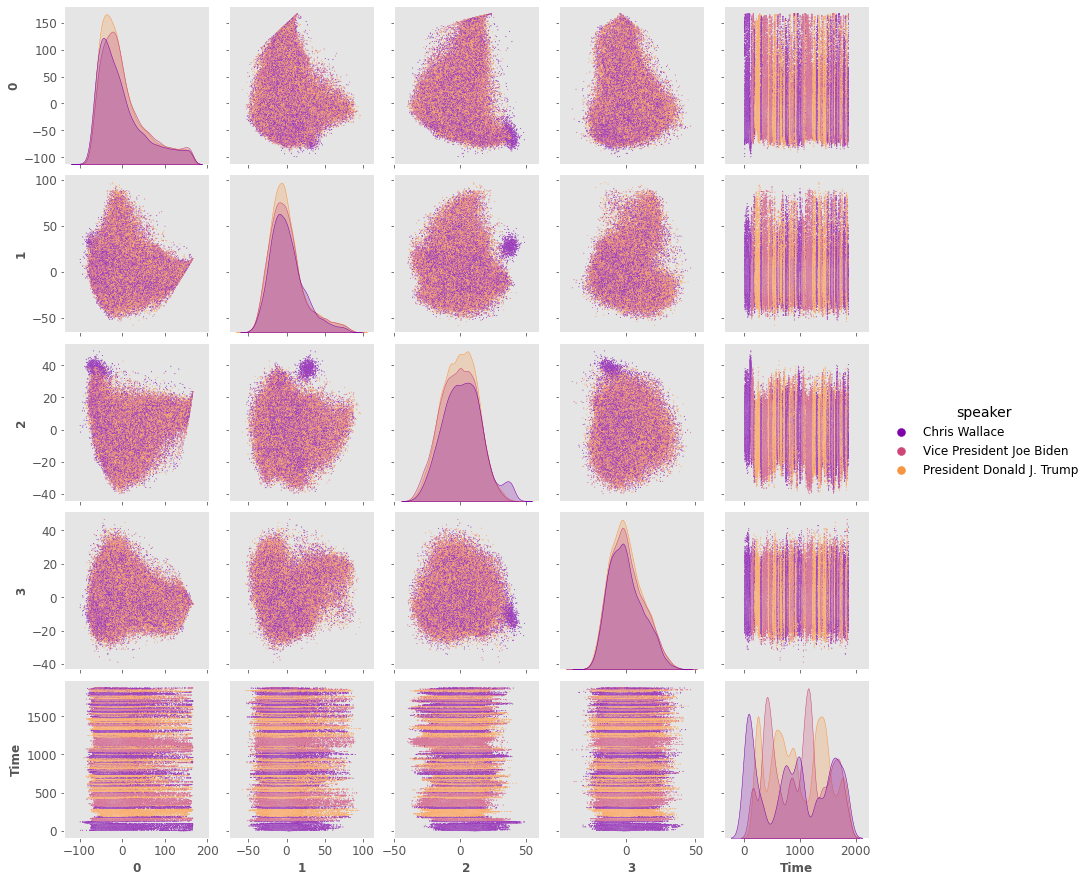

In [30]:
#plt.grid(True)

##### Here we are creating the pairplot on the data "pca_data" on the coloumn "speaker"

sns.pairplot(pca_data,hue='speaker',plot_kws={'s':1},palette='plasma')

In [31]:
##### As it was predictable, it is necessary to look at the time series to get a sense of what is going on. 
##### As we want to keep it simple, let’s use the Mutual Information to select the most informative feature and have a time series out of it.

In [32]:
#creating a time series

##### It calculates mutual information value for each of independent variables with respect to dependent variable, and selects the ones which has most information gain. 
##### In other words, it basically measures the dependency of features with the target value. 
##### The higher score means more dependent variables.

from sklearn.feature_selection import mutual_info_classif as mi

In [33]:
mi(X=pca_data[['Time',0,1,2,3]],y=pca_data['speaker'])

array([1.09049191, 0.00683899, 0.00436841, 0.01435224, 0.        ])

In [34]:
time_series_data = pca_data[['Time',2,'speaker']]
time_series_data.head()

,Time,2,speaker
0,0.000000,20.530884,Chris Wallace
1,0.023152,11.458249,Chris Wallace
2,0.046304,10.337750,Chris Wallace
3,0.069456,8.874607,Chris Wallace
4,0.092608,10.886119,Chris Wallace


In [35]:
time_series_data = time_series_data.rename(columns={2:'X'})

In [36]:
##### The most informative is the 2 component.

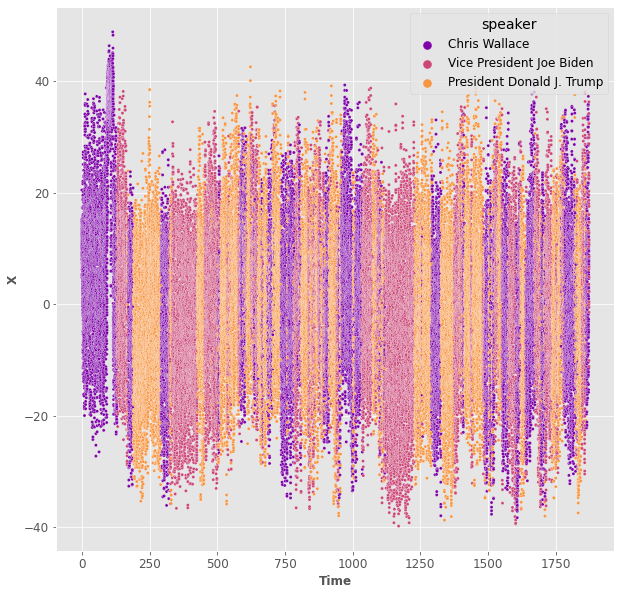

In [37]:
#sns.scatterplot(x='Time',y='X',hue='speaker',data=time_series_data,s=10,palette='plasma')
#plt.grid(True)
#time_series_data.head()
sns.scatterplot(x='Time',y='X',hue='speaker',data=time_series_data,s=10,palette='plasma')
plt.grid(True)

In [38]:
##### Using the LabelEncoder():

##### LabelEncoder can be used to normalize labels.
##### It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

le = preprocessing.LabelEncoder()

##### Fit label encoder and return encoded labels.

time_series_data['speaker'] = le.fit_transform(time_series_data.speaker)

In [39]:
##### Defining the dictionary : 
##### Here we are assigned number from 0 to 1 to the speakers.

encod_dic = {0:'Chris Wallace',2:'Vice President Joe Biden',1:'President Donald J. Trump'}

In [40]:
##### Now that we have everything we need, let’s talk about the Deep Learning. 
##### While it is well known that the Convolutional Neural Networks work extremely well on images, it is less known that they work good with time series as well. 
##### In fact, we will use a CNN to distinguish the three voices.
##use a CNN to distinguish the three voices

## CNN model

In [41]:
##### Now we are preparing the data for the model.

##### We are using three coloumns here "Time" , "X" , "speaker"

##### We are storing the coloumns "Time" and "X" into the variable X.

X=time_series_data[['Time','X']]

##### We are storing coloumn speaker into the variable "y"

y=time_series_data.speaker

In [42]:
##### Here we are splitting above created "X" and y the data into four groups X_train, X_test, y_train, y_test using train_test_split() with the test_size = 20% of the data and 80% for traning data. 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

##### random_state is basically used for reproducing your problem the same every time it is run. 
##### If you do not use a random_state in train_test_split, every time you make the split you might get a different set of train and test data points and will not help you in debugging in case you get an issue.

In [43]:
#####  A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. 
##### The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

x_train = np.array(X_train)
x_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

##### Here we are using np.array on the all four datasets that we created in above cell.
##### We are using np.array because for making the grid of the values of all the same type.

In [44]:
##### The reshape() function is used to give a new shape to an array without changing its data.

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [45]:
##### Here we are using len() for calculating the unique values in the dataset "y_train".

num_classes = len(np.unique(y_train))

In [46]:
##### Randomly permute a sequence, or return a permuted range.
##### If x is a multi-dimensional array, it is only shuffled along its first index.

idx = np.random.permutation(len(x_train))

x_train = x_train[idx]

y_train = y_train[idx]

In [47]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [48]:
##### Define the model:

In [49]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
#keras.utils.plot_model(model, show_shapes=True)

In [50]:
##### Train the model:

In [51]:
epochs = 30
batch_size = 50

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/30
1036/1036 [==============================] - 6s 4ms/step - loss: 0.9552 - sparse_categorical_accuracy: 0.5145 - val_loss: 0.8983 - val_sparse_categorical_accuracy: 0.5411 - lr: 0.0010
Epoch 2/30
1036/1036 [==============================] - 4s 4ms/step - loss: 0.9214 - sparse_categorical_accuracy: 0.5297 - val_loss: 0.8873 - val_sparse_categorical_accuracy: 0.5576 - lr: 0.0010
Epoch 3/30
1036/1036 [==============================] - 4s 4ms/step - loss: 0.9086 - sparse_categorical_accuracy: 0.5380 - val_loss: 0.8575 - val_sparse_categorical_accuracy: 0.5942 - lr: 0.0010
Epoch 4/30
1036/1036 [==============================] - 4s 4ms/step - loss: 0.8999 - sparse_categorical_accuracy: 0.5430 - val_loss: 0.8720 - val_sparse_categorical_accuracy: 0.5538 - lr: 0.0010
Epoch 5/30
1036/1036 [==============================] - 4s 4ms/step - loss: 0.8911 - sparse_categorical_accuracy: 0.5457 - val_loss: 0.8395 - val_sparse_categorical_accuracy: 0.5933 - lr: 0.0010
Epoch 6/30
1036/1036 [===

In [52]:
##### Here we are calculating the test loss and test accuracy on the data of x_test , y_test by using model.evaluate()

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

506/506 [==============================] - 1s 2ms/step - loss: 0.7747 - sparse_categorical_accuracy: 0.6162
Test accuracy 0.6162165403366089
Test loss 0.7746778726577759


In [53]:
encod_dic[0]

'Chris Wallace'

In [54]:
##### The model ends with a softmax. That means that we are basically obtaining the probability that Trump, Biden or Wallace are speaking.

In [55]:
##### Here we are creating the new dataframe from the prediction of the model on the data x_test.

pred_test = pd.DataFrame(model.predict(x_test))


In [56]:
##### Here we are renaming the coloumn names with the index position.

pred_test = pred_test.rename(columns={0:encod_dic[0]})

In [57]:
pred_test = pred_test.rename(columns={1:encod_dic[1]})

In [58]:
pred_test = pred_test.rename(columns={2:encod_dic[2]})

In [59]:
pred_test.head()

,Chris Wallace,President Donald J. Trump,Vice President Joe Biden
0,0.272026,0.421091,0.306883
1,0.381275,0.399844,0.218880
2,0.444352,0.328713,0.226935
3,0.330498,0.228666,0.440836
4,0.234259,0.458281,0.307459


In [60]:
##### Let’s explore the test set:

In [61]:
test_data = X_test.reset_index().drop('index',axis=1)

##### Here we are creating the new coloumn 'target' and storing content of the variable y_test into it.

test_data['target']=y_test

##### Here we are creating the new coloumn 'Chris Wallace' and storing values which we are got after the prediction pred_test['Chris Wallace']

test_data['Chris Wallace']=pred_test['Chris Wallace']


##### Here we are creating the new coloumn 'President Donald J. Trump' and storing values which we are got after the prediction pred_test['President Donald J. Trump']

test_data['President Donald J. Trump']=pred_test['President Donald J. Trump']

##### Here we are creating the new coloumn 'Vice President Joe Biden' and storing values which we are got after the prediction pred_test['Vice President Joe Biden']

test_data['Vice President Joe Biden']=pred_test['Vice President Joe Biden']

In [62]:
target_list = test_data.target.tolist()
for t in range(len(target_list)):
    target_list[t]=encod_dic[target_list[t]]

In [63]:
test_data['target']=target_list

In [64]:
test_data = test_data.sort_values(by='Time')

In [65]:
test_data

,Time,X,target,Chris Wallace,President Donald J. Trump,Vice President Joe Biden
11369,0.810321,15.264845,Chris Wallace,0.999111,0.000773,0.000116
1051,0.902930,5.240439,Chris Wallace,0.999203,0.000692,0.000105
10862,1.736403,11.884048,Chris Wallace,0.999143,0.000743,0.000114
12918,2.014227,15.339983,Chris Wallace,0.999111,0.000770,0.000119
7267,2.037379,12.906823,Chris Wallace,0.999134,0.000750,0.000116
...,...,...,...,...,...,...
3082,1872.398047,6.267359,Vice President Joe Biden,0.262960,0.375441,0.361598
1650,1872.699023,-1.395312,Vice President Joe Biden,0.259347,0.416193,0.324460
10746,1872.768480,-0.526983,Vice President Joe Biden,0.259924,0.411664,0.328413
10259,1872.791632,11.488815,Vice President Joe Biden,0.263914,0.348866,0.387220


In [66]:
##### And here is the results:

C:\Users\smrut\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\smrut\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\smrut\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\smrut\anaconda\l

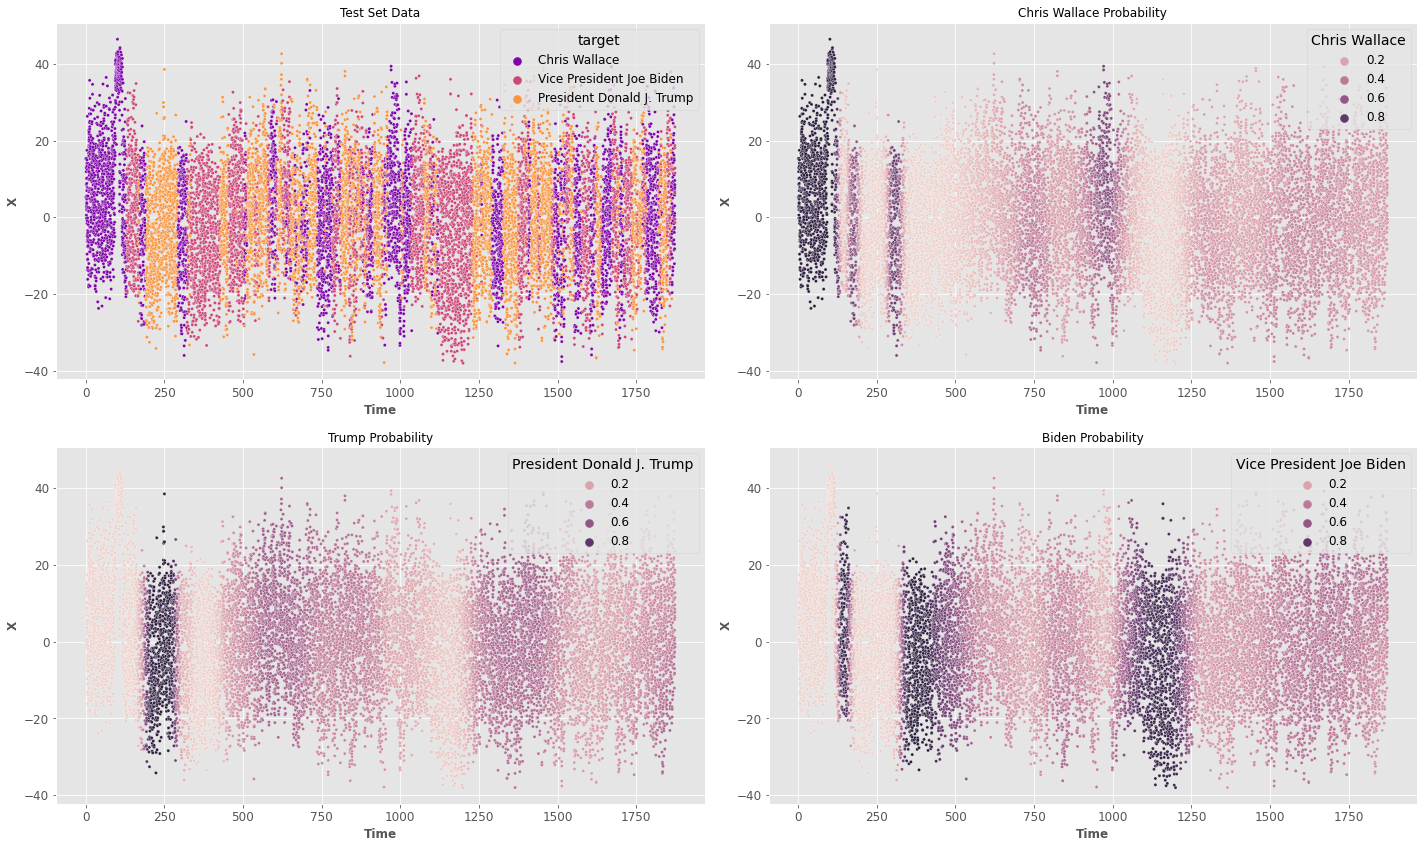

In [67]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.title('Test Set Data')
sns.scatterplot(test_data.Time,test_data.X,s=10,hue=test_data.target,palette='plasma')
plt.grid(True)
plt.subplot(2,2,2)
plt.title('Chris Wallace Probability')
sns.scatterplot(test_data.Time,test_data.X,s=10,hue=test_data['Chris Wallace'])
plt.grid(True)
plt.subplot(2,2,3)
plt.title('Trump Probability')
sns.scatterplot(test_data.Time,test_data.X,s=10,hue=test_data['President Donald J. Trump'])
plt.grid(True)
plt.subplot(2,2,4)
plt.title('Biden Probability')
sns.scatterplot(test_data.Time,test_data.X,s=10,hue=test_data['Vice President Joe Biden'])
plt.grid(True)
plt.tight_layout()

In [68]:
##### As it is possible to see, the probability is high when they are actually speaking, and it is a good sign! Plus we are severe if we evaluate the accuracy straightforward, as the algorithm is working with small fractions of seconds, while the human speech cannot vary so fast.

In [69]:
def model_to_clf(input_data):
    pred_list = model.predict(input_data)
    LIST_PRED = []
    for p in pred_list:
        LIST_PRED.append(np.argmax(p))
    return LIST_PRED

In [70]:
cm=confusion_matrix(model_to_clf(x_test),y_test)

In [71]:
cm_data = pd.DataFrame(cm,columns=[encod_dic[0],encod_dic[1],encod_dic[2]])

In [72]:
cm_data.index = [encod_dic[0],encod_dic[1],encod_dic[2]]

In [73]:
cm_data

,Chris Wallace,President Donald J. Trump,Vice President Joe Biden
Chris Wallace,2147,389,159
President Donald J. Trump,1284,3636,1138
Vice President Joe Biden,1481,1759,4188


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Chris Wallace'),
  Text(1.5, 0, 'President Donald J. Trump'),
  Text(2.5, 0, 'Vice President Joe Biden')])

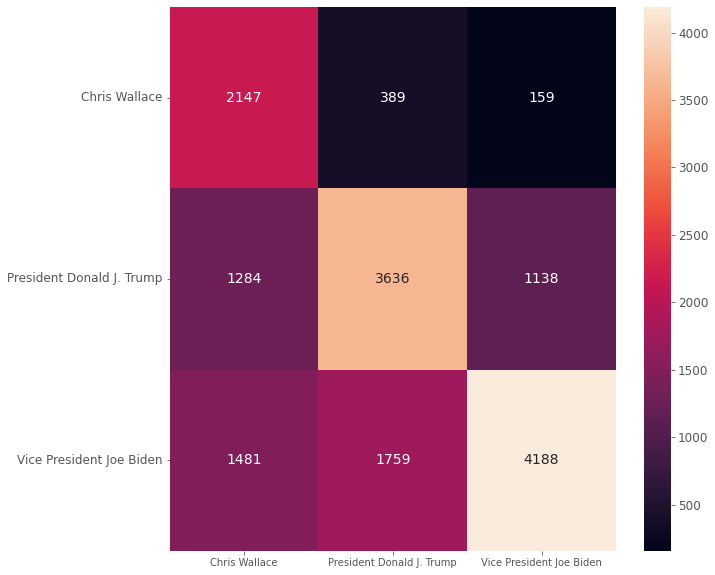

In [74]:
sns.heatmap(cm_data.astype(int), fmt='d', annot=True,cmap='rocket')
plt.yticks(rotation=0)
plt.xticks(rotation=0,fontsize=10)

In [75]:
##### A Classification report is used to measure the quality of predictions from a classification algorithm.

clf_report = classification_report(y_test,
                                   model_to_clf(x_test),
                                   labels= [0,1,2],
                                   target_names= [encod_dic[0],encod_dic[1],encod_dic[2]],
                                   output_dict=True)

<AxesSubplot:>

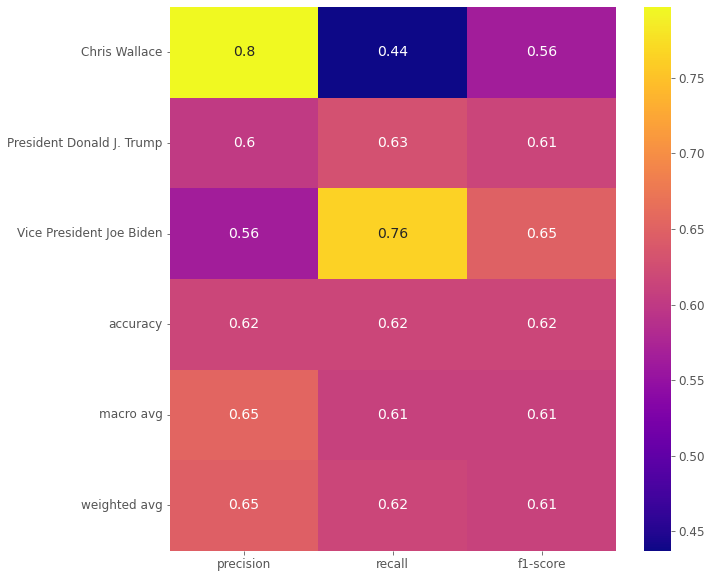

In [76]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True,cmap='plasma')

In [77]:
##### So we have a 62% of accuracy.